In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [2]:
# Paths to training and validation directories
base_dir = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\Data"
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'

# Image data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical'
)

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(1028, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')  
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

callback = myCallback()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=150,
    callbacks=[callback],
    verbose=2
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the model
# model.save('waste_classification_model.h5')


Found 8074 images belonging to 11 classes.
Found 1876 images belonging to 11 classes.
Epoch 1/150


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 - 49s - 97ms/step - accuracy: 0.1226 - loss: 2.3388 - val_accuracy: 0.1640 - val_loss: 2.1748
Epoch 2/150
504/504 - 0s - 232us/step - accuracy: 0.1250 - loss: 2.1027 - val_accuracy: 0.0000e+00 - val_loss: 1.9880
Epoch 3/150


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 - 47s - 93ms/step - accuracy: 0.2116 - loss: 2.1579 - val_accuracy: 0.2094 - val_loss: 2.1830
Epoch 4/150
504/504 - 0s - 193us/step - accuracy: 0.0000e+00 - loss: 2.7659 - val_accuracy: 0.2500 - val_loss: 1.9541
Epoch 5/150
504/504 - 47s - 93ms/step - accuracy: 0.2821 - loss: 2.0270 - val_accuracy: 0.3120 - val_loss: 1.9465
Epoch 6/150
504/504 - 0s - 190us/step - accuracy: 0.5000 - loss: 1.8351 - val_accuracy: 0.5000 - val_loss: 1.7088
Epoch 7/150
504/504 - 48s - 95ms/step - accuracy: 0.3349 - loss: 1.8910 - val_accuracy: 0.3659 - val_loss: 1.7839
Epoch 8/150
504/504 - 0s - 201us/step - accuracy: 0.3750 - loss: 1.8790 - val_accuracy: 0.5000 - val_loss: 1.1996
Epoch 9/150
504/504 - 48s - 95ms/step - accuracy: 0.3811 - loss: 1.7726 - val_accuracy: 0.4092 - val_loss: 1.7324
Epoch 10/150
504/504 - 0s - 206us/step - accuracy: 0.4375 - loss: 2.0069 - val_accuracy: 0.5000 - val_loss: 2.1767
Epoch 11/150
504/504 - 48s - 95ms/step - accuracy: 0.4320 - loss: 1.6818 - val_accuracy: 0.4177

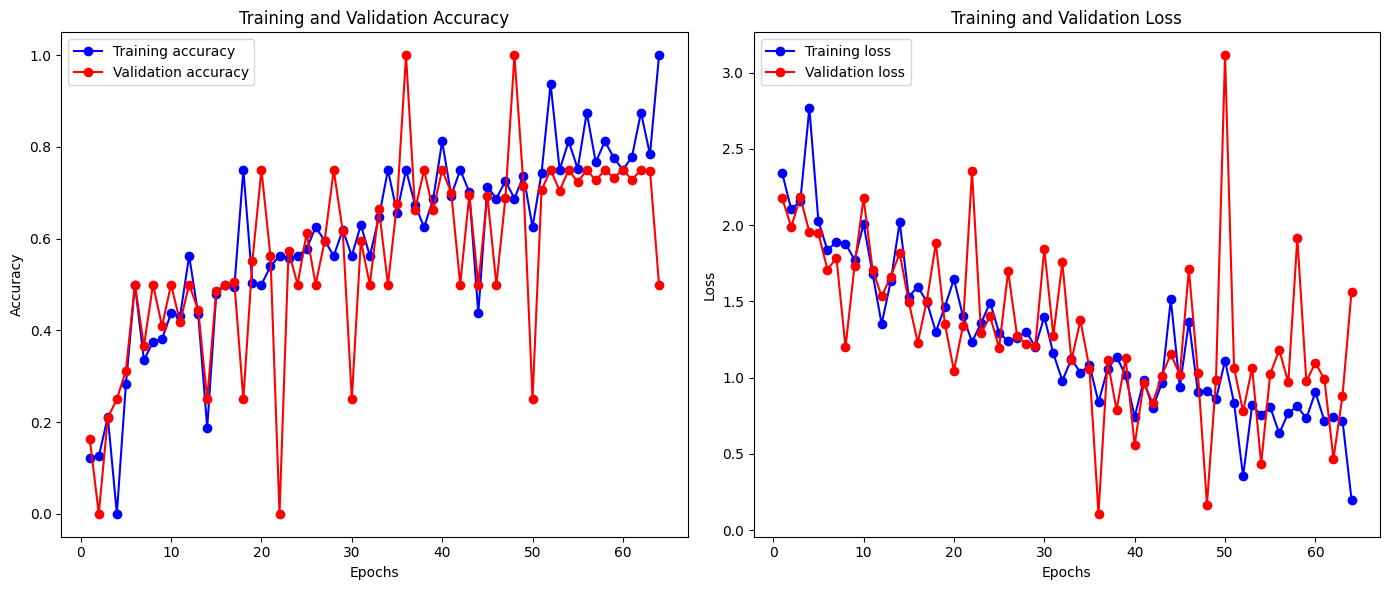

In [3]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Save the model
model.save('waste_classification_model100px.h5')

In [7]:
# Contoh jika menggunakan train_generator
class_indices = train_generator.class_indices
print(class_indices)


{'battery': 0, 'cardboard': 1, 'glass': 2, 'medis': 3, 'metal': 4, 'organic': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'textile': 9, 'vegetation': 10}


In [3]:
import numpy as np
import tensorflow as tf
# 1. Memuat Model yang Telah Dilatih
model_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\waste_classification_model100px.h5"
model = tf.keras.models.load_model(model_path)

# 2. Fungsi untuk Memuat dan Memproses Gambar
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    # Memuat gambar dalam warna (default)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    # Mengubah gambar menjadi array numpy
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Menambahkan dimensi tambahan karena model membutuhkan bentuk (batch_size, width, height, channels)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalisasi nilai piksel menjadi rentang [0, 1]
    img_array = img_array / 255.0
    return img_array

# 3. Melakukan Prediksi dengan Model
def predict_image(image_path, model, class_mapping):
    img_array = load_and_preprocess_image(image_path)
    # Melakukan prediksi
    predictions = model.predict(img_array)
    # Mendapatkan indeks kelas prediksi
    predicted_class = np.argmax(predictions)
    # Mendapatkan label untuk kelas yang diprediksi
    predicted_label = class_mapping[predicted_class]
    return predicted_label

# Dictionary yang memetakan nomor kelas ke label yang sesuai
class_mapping = {
    0: 'battery',
    1: 'cardboard',
    2: 'glass',
    3: 'medis',
    4: 'metal',
    5: 'organic',
    6: 'paper',
    7: 'plastic',
    8: 'shoes',
    9: 'textile',
    10: 'vegetation'
}

# 4. Path ke gambar yang ingin diprediksi
#image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_372.jpg"
image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_1.jpg"
# Melakukan prediksi dan menampilkan hasilnya
predicted_label = predict_image(image_path, model, class_mapping)
print(f"Prediksi kelas: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Prediksi kelas: vegetation
